In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [2]:
np.random.seed(320)
x_train = np.linspace(-1,1,50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

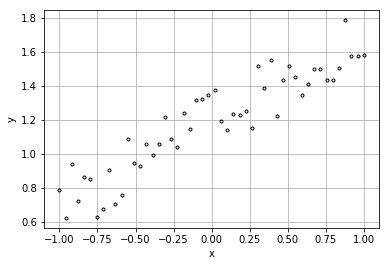

In [3]:
plt.plot(x_train,y_train,'.k',
         markerfacecolor='none')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
w = tf.Variable(tf.ones([1,1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

x = tf.placeholder(tf.float32, [None,1])

yhat = tf.matmul(x,w)+b

In [5]:
y = tf.placeholder(tf.float32, [None,1])

loss = tf.reduce_mean(tf.square(yhat-y))

In [6]:
MaxEpoch = 25
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [7]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:x_train,y:y_train})
            print(curr_w, curr_b, curr_loss)
        sess.run(train, feed_dict={x:x_train,
                                   y:y_train})
    w_tf_gd, b_tf_gd = sess.run([w,b])

[[1.]] [1.] 0.1524815
[[0.66522515]] [1.1854535] 0.028151726
[[0.53608906]] [1.1912489] 0.015063959
[[0.4862761]] [1.19143] 0.013121848
[[0.46706128]] [1.1914357] 0.012832876


In [8]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        sess.run(train, feed_dict={x:x_train,
                                   y:y_train})
    w_tf_gd, b_tf_gd = sess.run([w,b])

In [10]:
np.random.seed(320)
shuffled_id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]

In [11]:
from helper import generate_batches
batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:x_train,y:y_train})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch})
                            
    w_tf_gd, b_tf_gd = sess.run([w,b])
    

[[1.]] [1.] 0.1524815
[[0.4240258]] [1.1663983] 0.013741984
[[0.42400673]] [1.166396] 0.0137425065
[[0.42400673]] [1.166396] 0.0137425065
[[0.42400673]] [1.166396] 0.0137425065


# 비선형회귀 모델

### 이차 곡선 데이터

In [12]:
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**2+.25*x_train+1.0+.5 * np.random.rand(len(x_train))

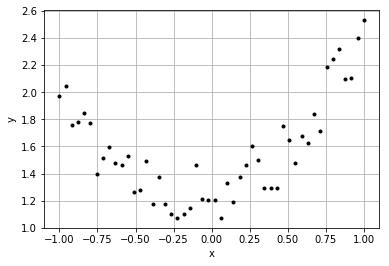

In [13]:
plt.plot(x_train,y_train,'.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
features = np.array([[xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1,1)

In [15]:
w = tf.Variable(tf.ones([2,1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x,w) + b
loss = tf.reduce_mean(tf.square(yhat - y))

In [16]:
MaxEpoch = 25
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [22]:
np.random.seed(320)
shuffled_id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:features,y:labels})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch})
                            
    w_tf_sgd, b_tf_sgd = sess.run([w,b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

[[1.]
 [1.]] [1.] 0.27033687
[[1.076062  ]
 [0.23619145]] [1.1704177] 0.01800622
[[1.0612648 ]
 [0.23138306]] [1.1769375] 0.017824525
[[1.0563606 ]
 [0.23150262]] [1.1790168] 0.017778212
[[1.0547773 ]
 [0.23155315]] [1.1796876] 0.01776432


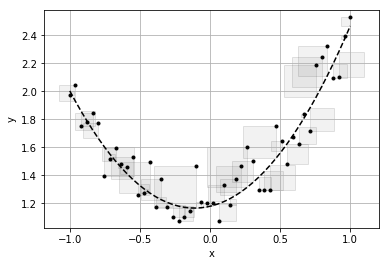

In [25]:
from matplotlib.patches import Rectangle
def visualize_l2(w,b,features,x_train,y_train):
    plt.plot(x_train,y_train,'.k')
    plt.plot(x_train,np.matmul(features,w)+b, '--k')
    currentAxis = plt.gca()
    for ff,xx,yy in zip(features,x_train,y_train):
        error = np.matmul(ff,w) + b - yy
        currentAxis.add_patch(Rectangle((xx,yy),error,error, 
                                        alpha=0.1,facecolor='gray',
                                        edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, y_train)

### 삼차곡선

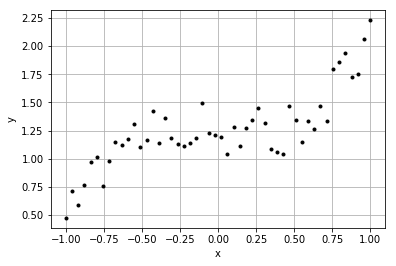

In [26]:
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3+0.1*x_train**2-.15*x_train+1.0+.5 * np.random.rand(len(x_train))

plt.plot(x_train,y_train,'.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
features = np.array([[xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1,1)

In [28]:
w = tf.Variable(tf.ones([3,1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 3])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x,w) + b
loss = tf.reduce_mean(tf.square(yhat - y))

In [29]:
MaxEpoch = 25
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [30]:
np.random.seed(320)
shuffled_id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:features,y:labels})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch})
                            
    w_tf_sgd, b_tf_sgd = sess.run([w,b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

[[1.]
 [1.]
 [1.]] [1.] 0.57014674
[[0.57525814]
 [0.42941985]
 [0.10803682]] [1.0714246] 0.03189389
[[0.6731134 ]
 [0.24562356]
 [0.04974759]] [1.1476407] 0.021883728
[[0.7469721 ]
 [0.18626072]
 [0.00303175]] [1.1714399] 0.019629695
[[ 0.8040568 ]
 [ 0.16686103]
 [-0.03414325]] [1.1785893] 0.018755484


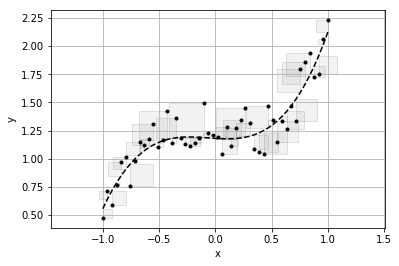

In [31]:
visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, y_train)

### 삼각함수

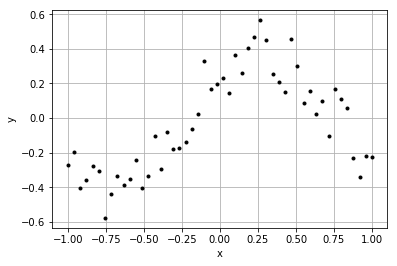

In [32]:
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = .25*np.cos(np.pi*x_train)+.3*np.sin(np.pi*x_train)+.2*(2*np.random.rand(len(x_train))-1)

plt.plot(x_train,y_train,'.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
features = np.array([[np.cos(np.pi*xval), np.sin(np.pi*xval)] for xval in x_train])
labels = y_train.reshape(-1,1)

In [34]:
w = tf.Variable(tf.ones([2,1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x,w) + b
loss = tf.reduce_mean(tf.square(yhat - y))

In [35]:
MaxEpoch = 25
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [36]:
np.random.seed(320)
shuffled_id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:features,y:labels})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch})
                            
    w_tf_sgd, b_tf_sgd = sess.run([w,b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

[[1.]
 [1.]] [1.] 1.5639328
[[0.23110393]
 [0.2858727 ]] [-0.0394818] 0.0113843335
[[0.23096298]
 [0.28525737]] [-0.0394916] 0.011390009
[[0.23096305]
 [0.28525692]] [-0.03949159] 0.011390012
[[0.23096305]
 [0.28525692]] [-0.03949159] 0.011390012


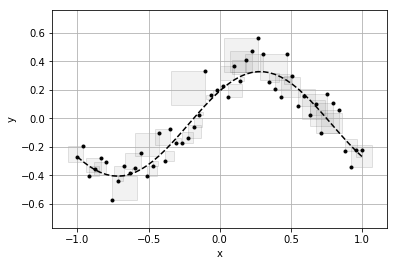

In [37]:
visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, y_train)

[[1.]
 [1.]
 [1.]] [1.] 2.8640282
[[ 0.09819868]
 [-0.19075064]
 [ 0.15132168]] [-0.02276271] 0.05297072
[[-0.09345467]
 [-0.40672165]
 [ 0.2864888 ]] [0.07265393] 0.032625314
[[-0.24828935]
 [-0.47479624]
 [ 0.39219296]] [0.10451153] 0.025367083
[[-0.37164122]
 [-0.49572507]
 [ 0.47506005]] [0.11574969] 0.021494066
[[-0.46927497]
 [-0.5017427 ]
 [ 0.540224  ]] [0.12016594] 0.019168818
[[-0.54635084]
 [-0.5031309 ]
 [ 0.5915313 ]] [0.12222457] 0.01772838
[[-0.6071333 ]
 [-0.50315106]
 [ 0.6319491 ]] [0.1233917] 0.016825266
[[-0.65504616]
 [-0.5028232 ]
 [ 0.66379523]] [0.12416574] 0.01625478
[[-0.6928077 ]
 [-0.50245464]
 [ 0.6888897 ]] [0.12472903] 0.015892053
[[-0.72256655]
 [-0.502129  ]
 [ 0.7086645 ]] [0.125158] 0.015659876
[[-0.7460181 ]
 [-0.50186116]
 [ 0.7242477 ]] [0.12549126] 0.015510153
[[-0.76449895]
 [-0.5016464 ]
 [ 0.73652774]] [0.12575233] 0.015412779
[[-0.77906257]
 [-0.50147605]
 [ 0.7462049 ]] [0.12595758] 0.01534884
[[-0.7905392 ]
 [-0.50134134]
 [ 0.7538308 ]] [0.

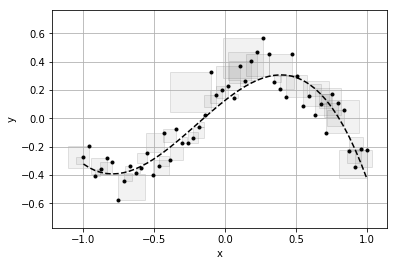

In [44]:
features = np.array([[xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1,1)

w = tf.Variable(tf.ones([3,1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 3])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x,w) + b
loss = tf.reduce_mean(tf.square(yhat - y))

MaxEpoch = 200
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

np.random.seed(320)
shuffled_id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:features,y:labels})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch})
                            
    w_tf_sgd, b_tf_sgd = sess.run([w,b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, y_train)

[[1.]
 [1.]
 [1.]
 [1.]] [1.] 3.8419266
[[-0.01998943]
 [ 0.10948324]
 [-0.289248  ]
 [ 0.14670518]] [0.01788581] 0.04713515
[[-0.06305835]
 [-0.08681584]
 [-0.40492234]
 [ 0.2835841 ]] [0.08830515] 0.032264695
[[-0.03677575]
 [-0.2447606 ]
 [-0.44762403]
 [ 0.3895495 ]] [0.10325572] 0.025754742
[[-0.00322599]
 [-0.36958337]
 [-0.4794799 ]
 [ 0.47261614]] [0.11025932] 0.021716187
[[ 0.02958042]
 [-0.46790254]
 [-0.5087282 ]
 [ 0.5379232 ]] [0.11568155] 0.019103907
[[ 0.06073501]
 [-0.54530555]
 [-0.536502  ]
 [ 0.5892893 ]] [0.12044957] 0.01737817
[[ 0.0902429]
 [-0.6062395]
 [-0.5629984]
 [ 0.6296897]] [0.1247569] 0.016212815
[[ 0.11821234]
 [-0.6542107 ]
 [-0.58828986]
 [ 0.661462  ]] [0.12868635] 0.015405314
[[ 0.14475137]
 [-0.6919797 ]
 [-0.61243093]
 [ 0.68644524]] [0.13229494] 0.014828887
[[ 0.16995649]
 [-0.7217191 ]
 [-0.6354723 ]
 [ 0.70608664]] [0.13562754] 0.014403789
[[ 0.19391352]
 [-0.74513865]
 [-0.6574626 ]
 [ 0.72152513]] [0.1387203] 0.014079585
[[ 0.21669918]
 [-0.76

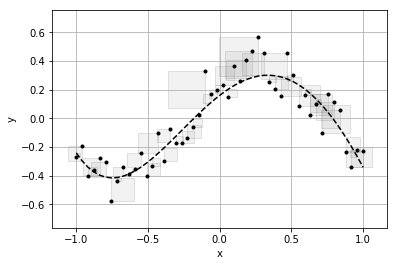

In [43]:
features = np.array([[xval**4, xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1,1)

w = tf.Variable(tf.ones([4,1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x,w) + b
loss = tf.reduce_mean(tf.square(yhat - y))

MaxEpoch = 100
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

np.random.seed(320)
shuffled_id = np.arange(0,len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w,b,loss],feed_dict={x:features,y:labels})
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch,
                                      y:y_batch})
                            
    w_tf_sgd, b_tf_sgd = sess.run([w,b])
    prediction_values = sess.run(yhat, feed_dict={x:features})

visualize_l2(w_tf_sgd, b_tf_sgd, features, x_train, y_train)